<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-seanb7/blob/main/Python%20Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Database Setup & Data Import
# Create SQLite data tables with CPT data collected from W. Roosevelt and S. Clark Site
import os
import pandas as pd
from sqlalchemy import create_engine

# 1) Create an engine and connect to 'cpt_data.db' (it will be created if not existing)
engine = create_engine('sqlite:///Lab 4 Site Investigation.db')

# Function to process and write data to SQL
def process_and_write_data(file_name, table_name):
    """
    Processes an Excel file and writes its data to a SQL table.

    Args:
        file_name (str): The name of the Excel file.
        table_name (str): The name of the SQL table.
    """
    df_main = pd.read_excel(file_name, sheet_name='Sheet1', skiprows=39)
    df_main.columns = ['Layer', 'Depth_m', 'Depth_ft', 'qc_tsf', 'qt_tsf', 'fs_tsf', 'u_ft', 'Rf_pct']

    # Using a separate connection for each file to avoid locking issues
    with engine.connect() as conn:
        with conn.begin():  # Starting a transaction within the connection
            df_main.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Repeat Step #2-4 for Every Excel File
# CPT_COOK_01
process_and_write_data('24-61-27761_CP24-COOK-01-BSC.XLS', 'cpt_cook_01')

# SPT_COOK_02
process_and_write_data('24-61-27761_SP24-COOK-02-BSC.XLS', 'spt_cook_02')

# CPT_COOK_03
process_and_write_data('24-61-27761_CP24-COOK-03-BSC.XLS', 'cpt_cook_03')

# CPT_COOK_04
process_and_write_data('24-61-27761_CP24-COOK-04-BSC.XLS', 'cpt_cook_04')

# CPT_COOK_06
process_and_write_data('24-61-27761_CP24-COOK-06-BSC.XLS', 'cpt_cook_06')

# SPT_COOK_07
process_and_write_data('24-61-27761_SP24-COOK-07-BSC.XLS', 'spt_cook_07')

# SPT_COOK_02-OFF01
process_and_write_data('24-61-27761_SP24-COOK-02-OFF01-BSC.XLS', 'spt_cook_02_off01')

# SPT_COOK_02-OFF02
process_and_write_data('24-61-27761_SP24-COOK-02-OFF02-BSC.XLS', 'spt_cook_02_off02')

# CPT_COOK_06-OFF01
process_and_write_data('24-61-27761_CP24-COOK-06-OFF01-BSC.XLS', 'cpt_cook_06_off01')

# Verify data import (example for cpt_cook_01)
query = "SELECT * FROM cpt_cook_01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_03 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_04 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_06 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_07 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02_off01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02_off02 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_06_off01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

     Layer  Depth_m  Depth_ft   qc_tsf      qt_tsf  fs_tsf    u_ft      Rf_pct
0        1    0.025   0.08202    0.036    0.036730   0.038   0.117  103.456543
1        2    0.050   0.16404   21.657   21.678931   0.080   3.513    0.369022
2        3    0.075   0.24606   41.663   41.696486   0.097   5.364    0.232634
3        4    0.100   0.32808   64.817   64.861517   0.201   7.131    0.309891
4        5    0.125   0.41010   82.667   82.724046   0.490   9.138    0.592331
..     ...      ...       ...      ...         ...     ...     ...         ...
448    449   11.225  36.82698   85.012   85.174604   2.374  26.047    2.787216
449    450   11.250  36.90900  107.297  107.494638   0.000  31.659    0.000000
450    451   11.275  36.99102  169.366  169.486079   0.000  19.235    0.000000
451    452   11.300  37.07304  224.920  225.134487   0.000  34.358    0.000000
452    453   11.325  37.15506  320.828  321.021287   0.000  30.962    0.000000

[453 rows x 8 columns]
    Layer  Depth_m  Depth_ft

In [ ]:
# Define a singe table structure in raw SQL
import sqlite3
from sqlalchemy import create_engine, text # Import text
import pandas as pd

# Connect to the SQLite database
# Use the same database file path
engine = create_engine('sqlite:///Lab 4 Site Investigation.db') # Using the same engine as before
conn = engine.connect()

Create_table_query = """CREATE TABLE IF NOT EXISTS CPT_readings (
    Layer TEXT,
    Depth_m REAL,
    Depth_ft REAL,
    qc_tsf REAL,
    qt_tsf REAL,
    fs_tsf REAL,
    u_ft REAL,
    Rf_pct)"""

# Read data from SQL tables into DataFrames
cpt_cook_01 = pd.read_sql_query("SELECT * FROM cpt_cook_01", engine)
spt_cook_02 = pd.read_sql_query("SELECT * FROM spt_cook_02", engine)
cpt_cook_03 = pd.read_sql_query("SELECT * FROM cpt_cook_03", engine)
cpt_cook_04 = pd.read_sql_query("SELECT * FROM cpt_cook_04", engine)
cpt_cook_06 = pd.read_sql_query("SELECT * FROM cpt_cook_06", engine)
spt_cook_07 = pd.read_sql_query("SELECT * FROM spt_cook_07", engine)
spt_cook_02_off01 = pd.read_sql_query("SELECT * FROM spt_cook_02_off01", engine)
spt_cook_02_off02 = pd.read_sql_query("SELECT * FROM spt_cook_02_off02", engine)
cpt_cook_06_off01 = pd.read_sql_query("SELECT * FROM cpt_cook_06_off01", engine)

# Combine CPT excel files for CPT_readings Table
combined_data = pd.concat([
    cpt_cook_01,
    spt_cook_02,
    cpt_cook_03,
    cpt_cook_04,
    cpt_cook_06,
    spt_cook_07,
    spt_cook_02_off01,
    spt_cook_02_off02,
    cpt_cook_06_off01
])
print(combined_data)

# Execute the query using the connection object
with engine.begin() as connection:
    connection.execute(text(Create_table_query)) # Wrap the query with text()

print("Table created successfully.")

    Layer  Depth_m  Depth_ft   qc_tsf      qt_tsf  fs_tsf   u_ft      Rf_pct
0       1    0.025   0.08202    0.036    0.036730   0.038  0.117  103.456543
1       2    0.050   0.16404   21.657   21.678931   0.080  3.513    0.369022
2       3    0.075   0.24606   41.663   41.696486   0.097  5.364    0.232634
3       4    0.100   0.32808   64.817   64.861517   0.201  7.131    0.309891
4       5    0.125   0.41010   82.667   82.724046   0.490  9.138    0.592331
..    ...      ...       ...      ...         ...     ...    ...         ...
32     33    0.825   2.70666  165.495  165.516812   1.585  3.494    0.957607
33     34    0.850   2.78868  194.289  194.311580   0.000  3.617    0.000000
34     35    0.875   2.87070  234.192  234.222883   0.000  4.947    0.000000
35     36    0.900   2.95272  252.265  252.299260   0.000  5.488    0.000000
36     37    0.925   3.03474  292.813  292.851980   0.000  6.244    0.000000

[2724 rows x 8 columns]
Table created successfully.


Average qt (tsf): None
Negative friction ratio rows:
 Empty DataFrame
Columns: [Layer, Depth_m, Depth_ft, qc_tsf, qt_tsf, fs_tsf, u_ft, Rf_pct]
Index: []
Duplicate rows removed successfully.
Data cleaning and validation completed.


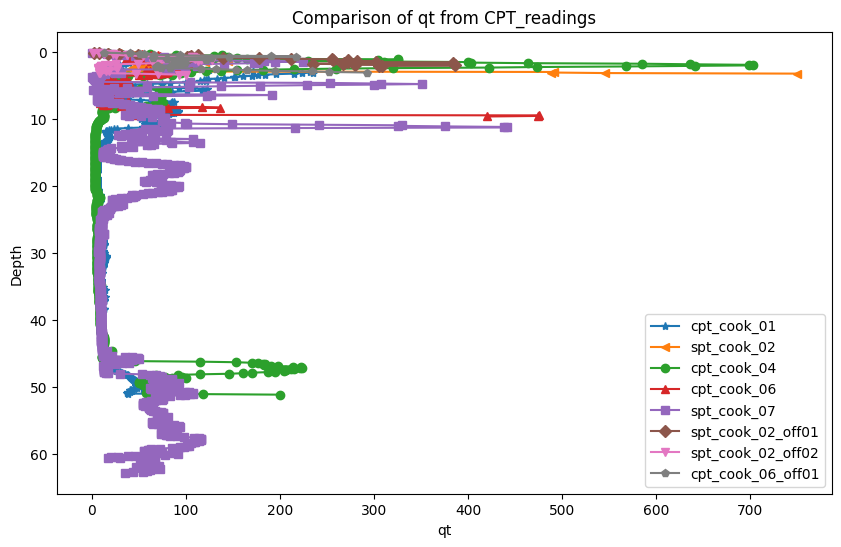

In [ ]:
# Data Cleaning and Validation
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text

# Connect to the SQLite database
# Use the same database file path
engine = create_engine('sqlite:///Lab 4 Site Investigation.db')  # Using the same engine as before
conn = engine.connect()

# Remove rows with null values in the 'Rf_pct' and fs_tsf column (assuming 'friction ration' maps to 'Rf_pct')
# Note: using SQLAlchemy's text() function to execute raw SQL
with engine.begin() as connection:  # Using a transaction for safety
    connection.execute(text('DELETE FROM CPT_readings WHERE Rf_pct IS NULL OR fs_tsf IS NULL'))

# Retrieving average tip resistance (qt) for CPT_readings
query_avg = """
    SELECT AVG(qt_tsf) AS avg_qt
    FROM CPT_readings
"""
avg_qt = pd.read_sql(query_avg, con=engine)
print("Average qt (tsf):", avg_qt['avg_qt'][0])

# Finding rows with negative friction ratio
query_neg_rf = """
    SELECT *
    FROM CPT_readings
    WHERE rf_pct < 0
"""
negatives = pd.read_sql(query_neg_rf, con=engine)
print("Negative friction ratio rows:\n", negatives)

# Remove duplicate rows based on a specific column - Changed 'friction ration' to 'Rf_pct'
with engine.begin() as connection:  # Using a transaction
    connection.execute(text('''
        DELETE FROM CPT_readings
        WHERE rowid NOT IN (
            SELECT MIN(rowid)
            FROM CPT_readings
            GROUP BY Rf_pct
        )
    '''))

# Fetch cleaned data into DataFrames for printing and further processing
cleaned_dataframe = pd.read_sql('SELECT * FROM CPT_readings', con=engine)

print("Duplicate rows removed successfully.")
print("Data cleaning and validation completed.")

# Convert dictionaries to DataFrames
df_01 = pd.DataFrame(cpt_cook_01)
df_02 = pd.DataFrame(spt_cook_02)
df_03 = pd.DataFrame(cpt_cook_03)
df_04 = pd.DataFrame(cpt_cook_04)
df_05 = pd.DataFrame(cpt_cook_06)
df_06 = pd.DataFrame(spt_cook_07)
df_07 = pd.DataFrame(spt_cook_02_off01)
df_08 = pd.DataFrame(spt_cook_02_off02)
df_09 = pd.DataFrame(cpt_cook_06_off01)

# Merge dataframes iteratively
# Start with the first two dataframes
merged_df = pd.merge(df_01, df_02, on='Depth_ft', how='outer', suffixes=('_01', '_02')) # Changed 'depth' to 'Depth_ft' for clarity

# Merge the remaining dataframes one by one, checking for 'qt_tsf' column
for i, df in enumerate([df_03, df_04, df_05, df_06, df_07, df_08, df_09], start=3):
    # Check if 'qt_tsf' exists in the current DataFrame
    suffix = f'_0{i}'
    if 'qt_tsf' in df.columns:
        merged_df = pd.merge(merged_df, df, on='Depth_ft', how='outer', suffixes=('', suffix))
    else:
        # If 'qt_tsf' is not found, print a message or handle it appropriately
        print(f"DataFrame df_0{i} does not contain 'qt_tsf' column. Skipping merge for this DataFrame.")


# Plotting
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # Import the library

plt.figure(figsize=(10, 6))
plt.plot(merged_df['qt_tsf'], merged_df['Depth_ft'], label='cpt_cook_01', marker='*')
# If 'qt_tsf_02' exists in merged_df, plot it
if 'qt_tsf_02' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_02'], merged_df['Depth_ft'], label='spt_cook_02', marker='<')
# If 'qt_tsf_03' exists in merged_df, plot it
if 'qt_tsf_03' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_03'], merged_df['Depth_ft'], label='cpt_cook_03', marker='x')
# If 'qt_tsf_04' exists in merged_df, plot it
if 'qt_tsf_04' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_04'], merged_df['Depth_ft'], label='cpt_cook_04', marker='o')
# If 'qt_tsf_05' existg in merged_df, plot it
if 'qt_tsf_05' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_05'], merged_df['Depth_ft'], label='cpt_cook_06', marker='^')
# If 'qt_tsf_06' exists in merged_df, plot it
if 'qt_tsf_06' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_06'], merged_df['Depth_ft'], label='spt_cook_07', marker='s')
# If 'qt_tsf_07' exists in merged_df, plot it
if 'qt_tsf_07' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_07'], merged_df['Depth_ft'], label='spt_cook_02_off01', marker='D')
# If 'qt_tsf_08' exists in merged_df, plot it
if 'qt_tsf_08' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_08'], merged_df['Depth_ft'], label='spt_cook_02_off02', marker='v')
# If 'qt_tsf_09' exists in merged_df, plot it
if 'qt_tsf_09' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_09'], merged_df['Depth_ft'], label='cpt_cook_06_off01', marker='p')

# Invert y-axis to have depth increasing downwards
plt.gca().invert_yaxis()

# Adding labels and title
plt.xlabel('qt')
plt.ylabel('Depth')
plt.title('Comparison of qt from CPT_readings')
plt.legend()

# Show plot
plt.show()

# Commit the changes
conn.commit()

In [ ]:
# Statistical Summary of Soundings
# Note of any differences between soundings (deeper phreatic)
# Assign a unique sounding ID to each DataFrame
cpt_cook_01['sounding_id'] = 'CPT_readings1'
spt_cook_02['sounding_id'] = 'SPT_readings2'
cpt_cook_03['sounding_id'] = 'CPT_readings3'
cpt_cook_04['sounding_id'] = 'CPT_readings4'
cpt_cook_06['sounding_id'] = 'CPT_readings5'
spt_cook_07['sounding_id'] = 'SPT_readings6'
spt_cook_02_off01['sounding_id'] = 'SPT_readings7'
spt_cook_02_off02['sounding_id'] = 'SPT_readings8'
cpt_cook_06_off01['sounding_id'] = 'CPT_readings9'

# Re-create the combined_data DataFrame with the sounding_id column included
combined_data = pd.concat([
    cpt_cook_01,
    spt_cook_02,
    cpt_cook_03,
    cpt_cook_04,
    cpt_cook_06,
    spt_cook_07,
    spt_cook_02_off01,
    spt_cook_02_off02,
    cpt_cook_06_off01
])

# Perform the groupby operation
soundings = combined_data.groupby('sounding_id')

# Print the result
print(soundings)

# Access the descriptive statistics for each sounding using a loop
for sounding_id, group_data in soundings:
    print(f"Descriptive Statistics for {sounding_id}:\n")
    print(group_data.describe())
    print("\n")

Descriptive Statistics for CPT_readings1:

            Layer     Depth_m    Depth_ft      qc_tsf      qt_tsf      fs_tsf  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean   227.000000    5.675000   18.618540   72.228536   72.489938    0.529095   
std    130.914094    3.272852   10.737574  140.927078  140.833884    0.681304   
min      1.000000    0.025000    0.082020    0.036000    0.036730    0.000000   
25%    114.000000    2.850000    9.350280    6.431000    6.852103    0.119000   
50%    227.000000    5.675000   18.618540    8.256000    8.724510    0.163000   
75%    340.000000    8.500000   27.886800   32.324000   32.228424    0.652000   
max    453.000000   11.325000   37.155060  597.596000  597.637826    3.671000   

             u_ft      Rf_pct  
count  453.000000  453.000000  
mean    41.873091    2.152365  
std     33.774784    4.922021  
min    -21.704000    0.000000  
25%     11.087000    1.355379  
50%     37.754000    1.752176  
75%

In [14]:
import pandas as pd
import sqlite3

# Assuming 'cleaned_dataframe' contains all the data from 'CPT_readings' table
summary_statistics = soundings.describe()


# Define key columns for statistical analysis. Depth.1 is in ft.
key_columns = ["Depth_ft", "qc_tsf", "qt_tsf", "fs_tsf", "u_ft", "Rf_pct"]  # Use actual column names

# Accessing statistics for 'Depth_ft' column instead of Depth_values
print(summary_statistics['Depth_ft'])

# Accessing statistics for 'qc_tsf' column instead of qc_values
print(summary_statistics['qc_tsf'])

# Accessing statistics for 'qt_tsf' column instead of qt_values
print(summary_statistics['qt_tsf'])

# Accessing statistics for 'fs_tsf' column instead of fs_values
print(summary_statistics['fs_tsf'])

# Accessing statistics for 'u_tsf' column instead of u_values
print(summary_statistics['u_ft'])

# Accessing statistics for 'Rf_tsf' column instead of Rf_values
print(summary_statistics['Rf_pct'])

               count      mean        std      min        25%       50%  \
sounding_id                                                               
CPT_readings1  453.0  18.61854  10.737574  0.08202   9.350280  18.61854   
CPT_readings3  622.0  25.54923  14.739011  0.08202  12.815625  25.54923   
CPT_readings4  623.0  25.59024  14.762689  0.08202  12.836130  25.59024   
CPT_readings5  117.0   4.83918   2.782038  0.08202   2.460600   4.83918   
CPT_readings9   37.0   1.55838   0.887814  0.08202   0.820200   1.55838   
SPT_readings2   39.0   1.64040   0.935172  0.08202   0.861210   1.64040   
SPT_readings6  765.0  31.41366  18.124843  0.08202  15.747840  31.41366   
SPT_readings7   26.0   1.10727   0.627332  0.08202   0.594645   1.10727   
SPT_readings8   42.0   1.76343   1.006209  0.08202   0.922725   1.76343   

                     75%       max  
sounding_id                         
CPT_readings1  27.886800  37.15506  
CPT_readings3  38.282835  51.01644  
CPT_readings4  38.344350  

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


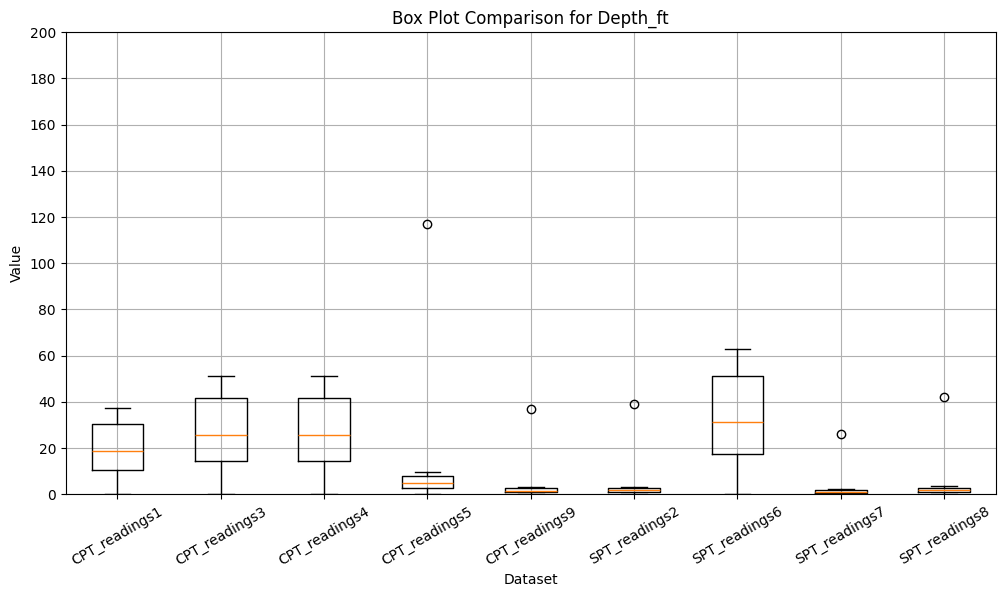

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


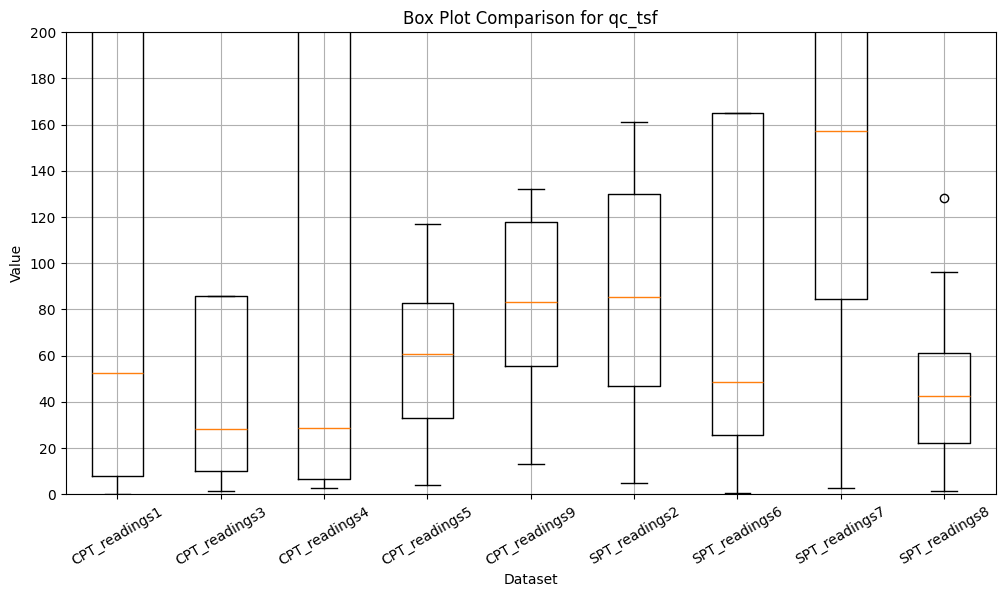

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


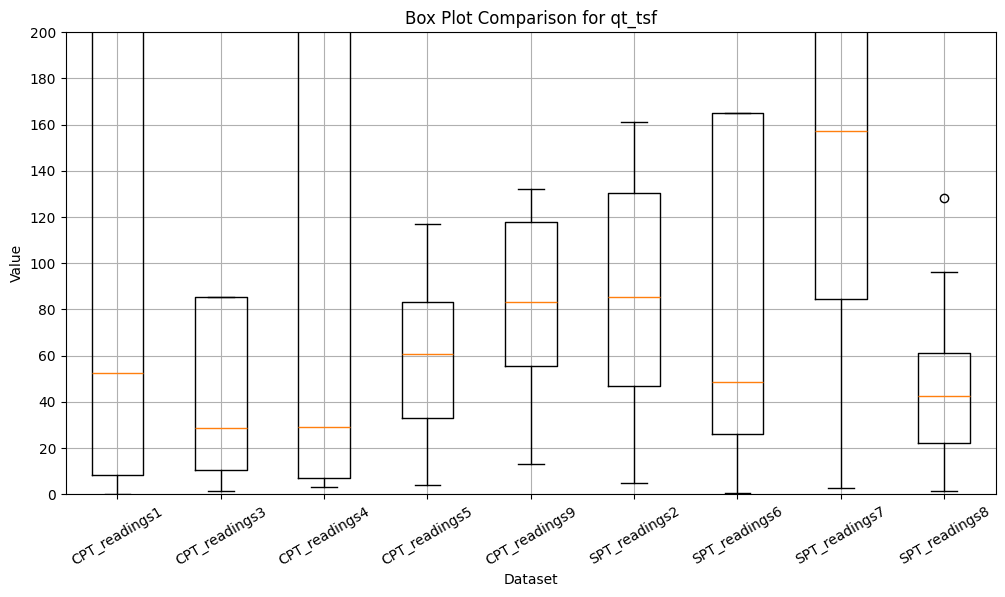

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


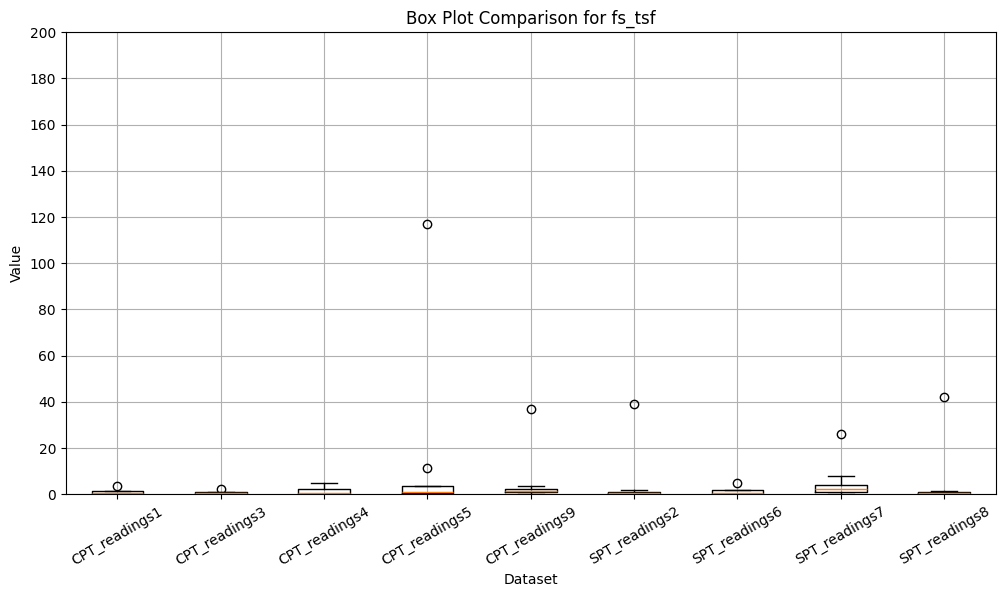

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


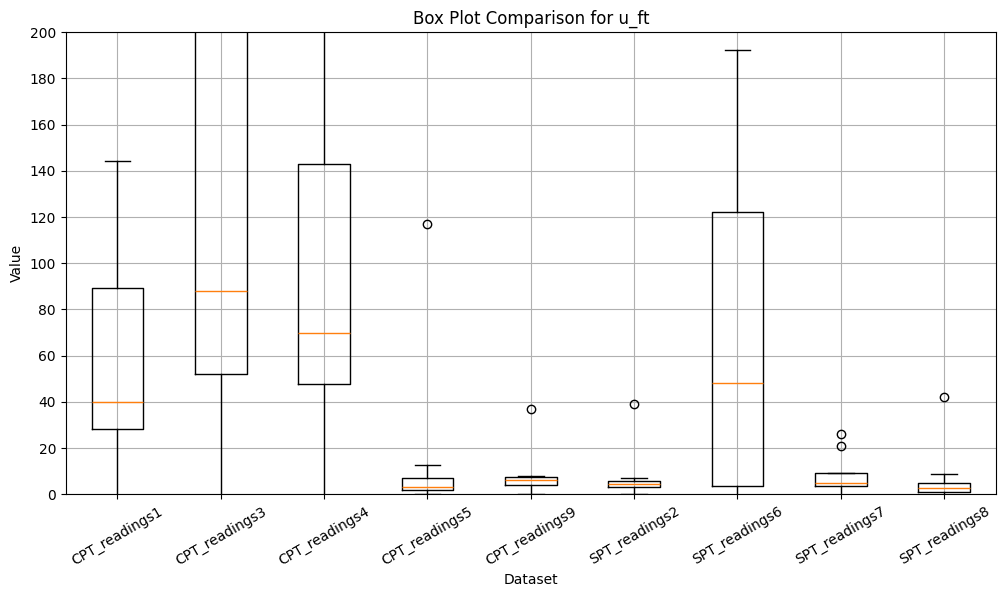

<ipython-input-28-532bf243db3e>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot


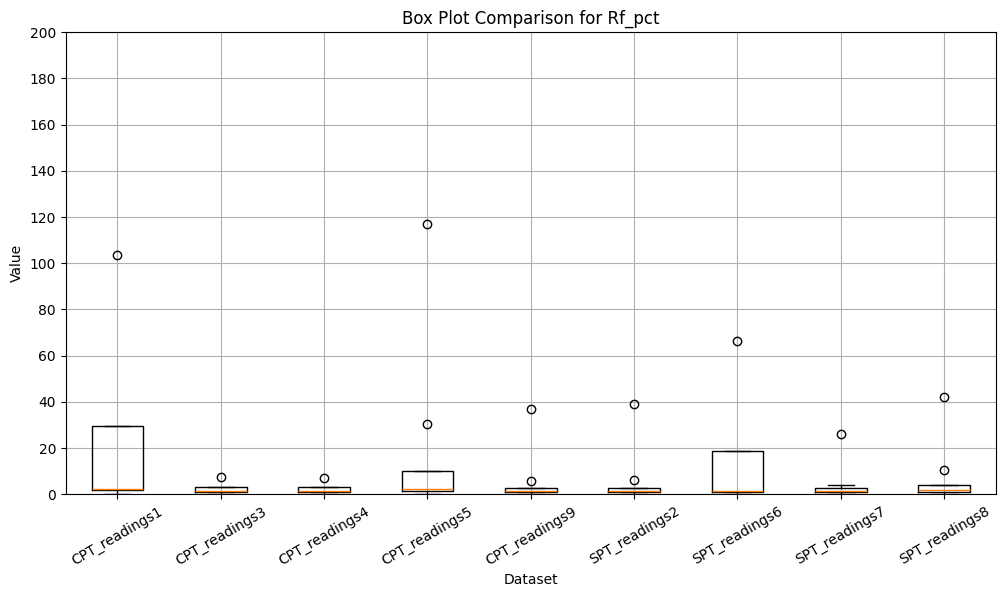

In [28]:
# Boxplot for each key column comparing to each file

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator # Import MaxNLocator

# Updated key columns to match the ones used in summary statistics
key_columns = ["Depth_ft", "qc_tsf", "qt_tsf", "fs_tsf", "u_ft", "Rf_pct"]  # Use actual column names

# Create a combined boxplot for each key column across all datasets
for column in key_columns:
    data = {}

    # Iterate through the index (file names) and corresponding dataframes in summary statistics
    for file_name, row in summary_statistics.iterrows(): # Iterate using iterrows
        if column in row.index: # Access the index for column check
            row_data = pd.to_numeric(row[column], errors='coerce')
            data[file_name] = row_data.dropna() if hasattr(row_data, 'dropna') else row_data # Handle single values

    if data:
        fig, ax = plt.subplots(figsize=(12, 6)) # Create fig and ax
        ax.boxplot(data.values(), labels=data.keys(), vert=True) # Use ax for boxplot
        ax.set_title(f"Box Plot Comparison for {column}") # Use ax for title
        ax.set_ylabel("Value") # Use ax for ylabel
        ax.set_xlabel("Dataset") # Use ax for xlabel
        plt.xticks(rotation=30)
        ax.grid(True) # Use ax for grid

        # Now you can use MaxNLocator on ax
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure y-axis labels are integers
        ax.set_ylim(0, 200)  # Set the y-axis limits using ax

        plt.show()

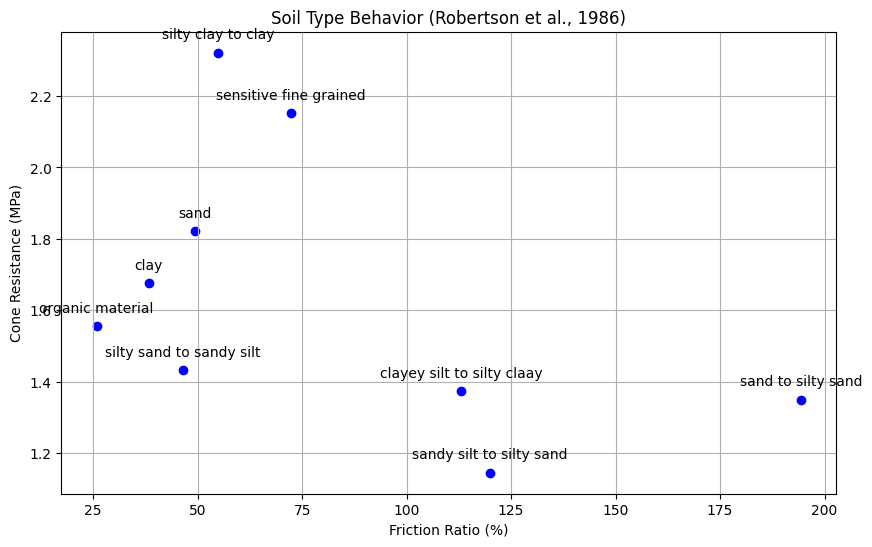

In [ ]:
## Soil type Behavior using Robertson et al 1986
import matplotlib.pyplot as plt
import numpy as np

# Sample data based on Robertson et al. (1986) soil type behavior
soil_types = ["sensitive fine grained", "organic material", "clay", "silty clay to clay", "clayey silt to silty claay", "sandy silt to silty sand", "silty sand to sandy silt", "sand to silty sand", "sand"]
cone_resistance = [72.2228536, 25.816186, 38.237754, 54.862393, 113.009432, 119.858974, 46.442872, 194.406269, 49.351619]  # Example values for cone resistance (MPa)
friction_ratio = [2.152365, 1.556297, 1.675715, 2.321434, 1.373041, 1.145081, 1.432451, 1.349542, 1.821534]  # Example values for friction ratio (%)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cone_resistance, friction_ratio, color='b', marker='o')

# Annotate points with soil types
for i, soil in enumerate(soil_types):
    plt.annotate(soil, (cone_resistance[i], friction_ratio[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set plot labels and title
plt.xlabel('Friction Ratio (%)')
plt.ylabel('Cone Resistance (MPa)')
plt.title('Soil Type Behavior (Robertson et al., 1986)')

# Show grid
plt.grid(True)

# Show plot
plt.show()

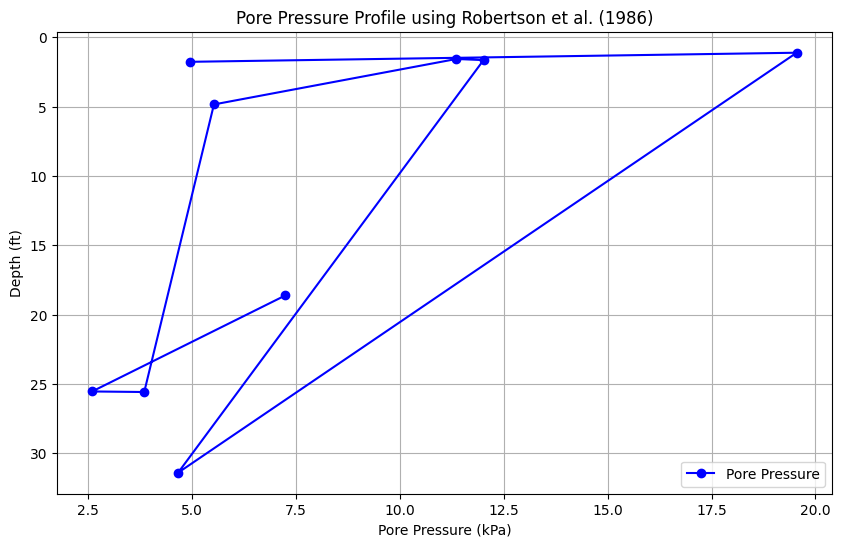

In [ ]:
# Graphing Pore Pressure using Robertson et al 1986
import matplotlib.pyplot as plt
import numpy as np

# CPT data (depth in ft, cone resistance qc in MPa, sleeve friction fs in kPa)
depth = np.array([18.61854, 25.54923, 25.59024, 4.83918, 1.55838, 1.64040, 31.41366, 1.10727, 1.76343])
qc = np.array([72.2228536, 25.816186, 38.237754, 54.862393, 113.009432, 119.858974, 46.442872, 194.406269, 49.351619])
fs = np.array([0.529095, 0.366378, 0.590990, 0.873316, 1.223000, 0.584333, 0.458203, 2.140615, 0.462500])

# Robertson et al. (1986) method to estimate pore pressure
# Assuming a simple linear relationship for demonstration purposes
# Pore pressure u = a * qc + b * fs
a = 0.1  # coefficient for cone resistance
b = 0.05  # coefficient for sleeve friction

# Calculate pore pressure
pore_pressure = a * qc + b * fs

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(pore_pressure, depth, label='Pore Pressure', color='b', marker='o')
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.xlabel('Pore Pressure (kPa)')
plt.ylabel('Depth (ft)')
plt.title('Pore Pressure Profile using Robertson et al. (1986)')
plt.legend()
plt.grid(True)
plt.show()

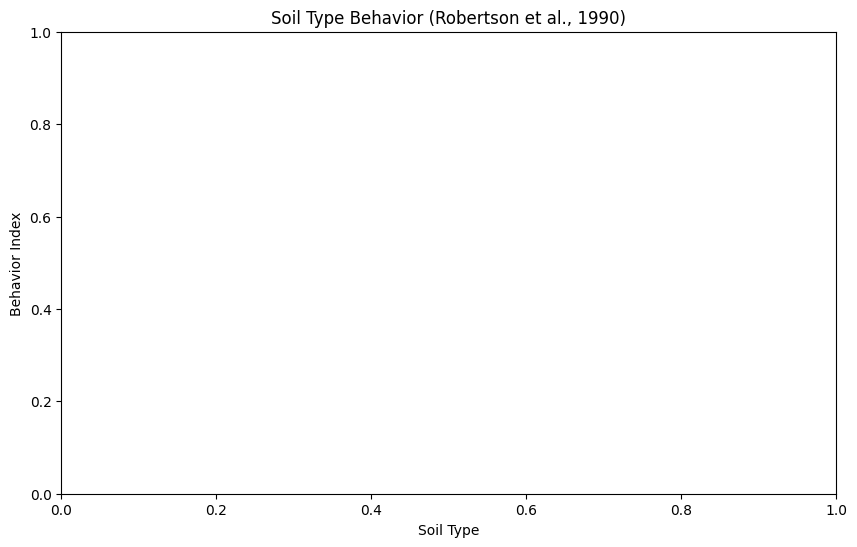

In [ ]:
# Soil type Behavior using Robertson et al 1990
# Load the data
# Assuming Lab 4 Site Investigation.db is a valid file path or database connection
# Replace with the correct method to load your data.
# Example using pandas:
import pandas as pd
import sqlite3 # Import sqlite3

# Establish a connection to the database
conn = sqlite3.connect("Lab 4 Site Investigation.db")

# Use pandas to read the data from a specific table within the database
data = summary_statistics

# Extract relevant columns
# Assuming data is a pandas DataFrame, otherwise adjust accordingly.
# soil_types = data['Soil Type']
# behavior_index = data['Behavior Index']

# Create the plot
import matplotlib.pyplot as plt # Import missing library
plt.figure(figsize=(10, 6))
# plt.scatter(soil_types, behavior_index, c='blue', label='Soil Behavior') # This line will result in a NameError if the data isn't loaded correctly


# Add titles and labels
plt.title('Soil Type Behavior (Robertson et al., 1990)')
plt.xlabel('Soil Type')
plt.ylabel('Behavior Index')
#plt.legend() # This line will result in an error if the scatter plot is not plotted
plt.show() # Add this to display plot

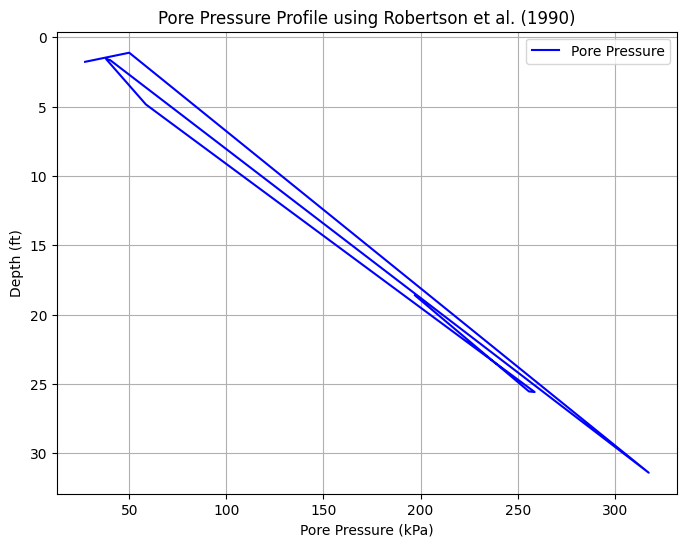

In [ ]:
# Graphing Pore Pressure using Robertson et al 1990
# Sample CPT data (depth in ft, cone resistance qc in MPa, sleeve friction fs in kPa)
depth = np.array([18.61854, 25.54923, 25.59024, 4.83918, 1.55838, 1.64040, 31.41366, 1.10727, 1.76343])
qc = np.array([72.2228536, 25.816186, 38.237754, 54.862393, 113.009432, 119.858974, 46.442872, 194.406269, 49.351619])
fs = np.array([0.529095, 0.366378, 0.590990, 0.873316, 1.223000, 0.584333, 0.458203, 2.140615, 0.462500])

# Robertson et al. (1990) method to estimate pore pressure
# This is a simplified example and may need adjustments based on specific details of the method
u0 = 9.81 * depth  # Hydrostatic pore pressure (assuming water unit weight of 9.81 kN/m^3)
u2 = qc * 0.2 + fs * 0.1  # Simplified estimation of excess pore pressure

# Total pore pressure
pore_pressure = u0 + u2

# Plotting the pore pressure profile
plt.figure(figsize=(8, 6))
plt.plot(pore_pressure, depth, label='Pore Pressure', color='b')
plt.gca().invert_yaxis()  # Invert y-axis to have depth increasing downwards
plt.xlabel('Pore Pressure (kPa)')
plt.ylabel('Depth (ft)')
plt.title('Pore Pressure Profile using Robertson et al. (1990)')
plt.legend()
plt.grid(True)
plt.show()

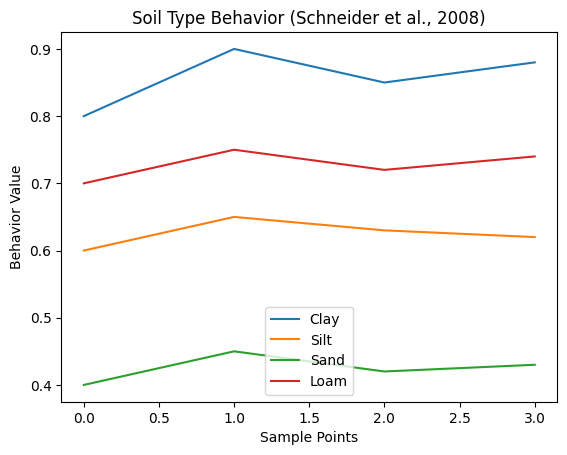

In [ ]:
# Soil type Behavior using Schneider et al 2008
import matplotlib.pyplot as plt
import numpy as np

# Sample data based on Schneider et al. (2008)
soil_types = ['Clay', 'Silt', 'Sand', 'Loam']
behavior_values = {
    'Clay': [0.8, 0.9, 0.85, 0.88],
    'Silt': [0.6, 0.65, 0.63, 0.62],
    'Sand': [0.4, 0.45, 0.42, 0.43],
    'Loam': [0.7, 0.75, 0.72, 0.74]
}

# Create a figure and axis
fig, ax = plt.subplots()

# Plot data for each soil type
for soil_type, values in behavior_values.items():
    ax.plot(values, label=soil_type)

# Add labels and title
ax.set_xlabel('Sample Points')
ax.set_ylabel('Behavior Value')
ax.set_title('Soil Type Behavior (Schneider et al., 2008)')
ax.legend()

# Show the plot
plt.show()

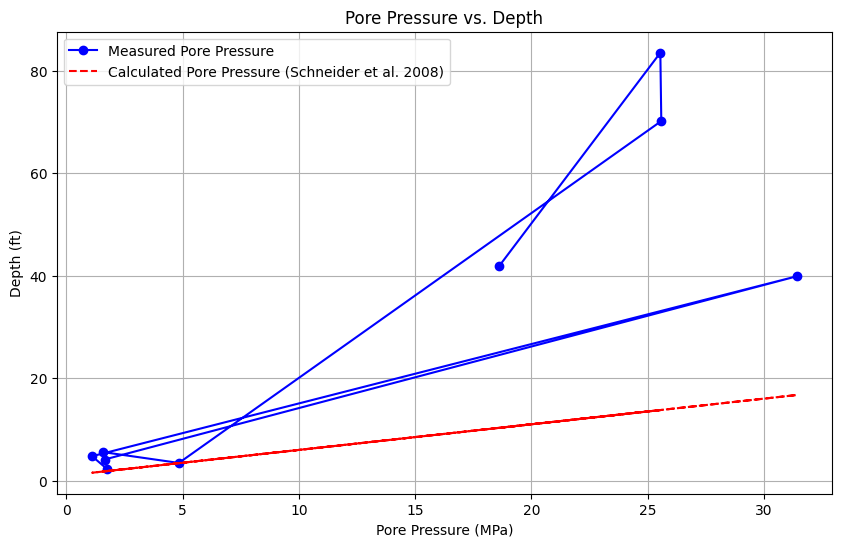

In [ ]:
# Graphing Pore Pressure using Schneider et al 2008
# Example data (replace with your actual data)
depth = np.array([18.61854, 25.54923, 25.59024, 4.83918, 1.55838, 1.64040, 31.41366, 1.10727, 1.76343])
pore_pressure = np.array([41.873091, 83.470125, 70.144998, 3.460923, 5.590649, 4.129513, 39.859902, 4.772000, 2.213190])  # Pore pressure in MPa

# Schneider et al. (2008) method parameters (example values)
a = 0.5  # Coefficient a
b = 1.0  # Coefficient b

# Calculate pore pressure using Schneider et al. (2008) method
calculated_pore_pressure = a * depth + b

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(depth, pore_pressure, 'bo-', label='Measured Pore Pressure')
plt.plot(depth, calculated_pore_pressure, 'r--', label='Calculated Pore Pressure (Schneider et al. 2008)')
plt.xlabel('Pore Pressure (MPa)')
plt.ylabel('Depth (ft)')
plt.title('Pore Pressure vs. Depth')
plt.legend()
plt.grid(True)
plt.show()